In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

plt.rcParams["font.size"] = 12
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'

In [10]:
# params
loc1 = "/home/hcm7920/experiments/arcticMiddepthBI/"
loc2 = "analysis/figData/"

nx = 500
ny = 500
nz = 50
dx = 2000
dy = 2000

dI = 32

In [11]:
# load arrays
modelDepth   = np.load(loc1+loc2+"modelDepth.npy")
modelNSquare = np.load(loc1+loc2+"modelNSquare.npy")
modelRho     = np.load(loc1+loc2+"modelRho.npy")
modelVelU    = np.load(loc1+loc2+"modelVelU.npy")
modelHorizDG = np.load(loc1+loc2+"modelHorizDG.npy")
meanGamma    = np.load(loc1+loc2+"meanGamma.npy")
dpthGamma    = np.load(loc1+loc2+"dpthGamma.npy")
meanGdy      = np.load(loc1+loc2+"meanGdy.npy")
dpthGdy      = np.load(loc1+loc2+"dpthGdy.npy")


In [12]:
# generate horizonal grid

crossChannelDist = np.linspace(-0.5*dy*ny,0.5*dy*ny,ny)/1000

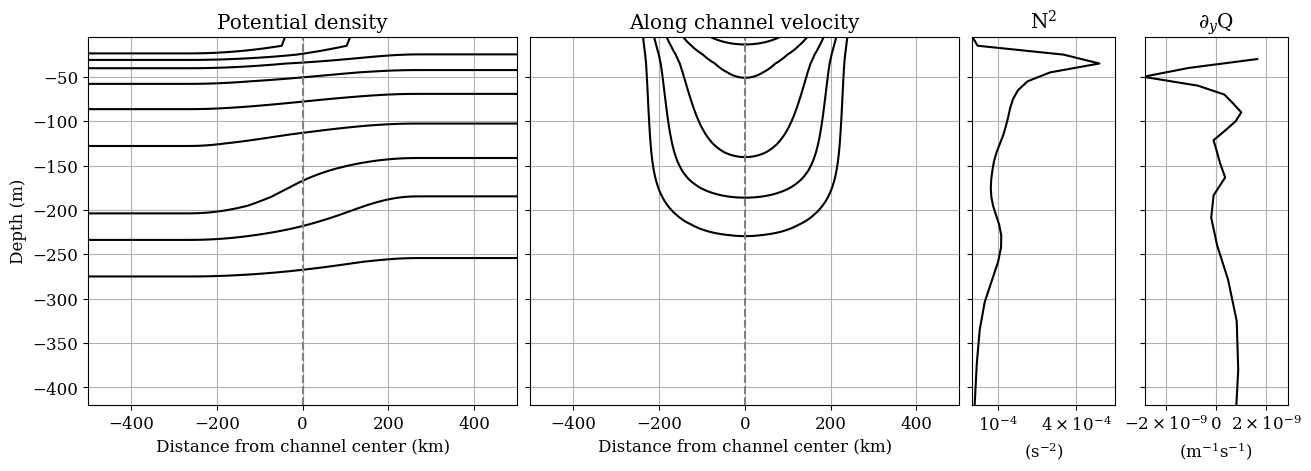

In [13]:
# construct fig
dI = 30
fac = 1 - 1e-3
layout = [["A","A","A","B","B","B","C","D"]]
yLims = [(-modelDepth[:dI]).min(),(-modelDepth[:dI]).max()]
fig,axDict = plt.subplot_mosaic(layout,sharey=True,
                               figsize=(13,4.6), layout='constrained');

# subplot A, density
levs = np.linspace(fac*modelRho.min(),fac*modelRho.max(),10)
levs = np.arange(fac*modelRho[:,1:-1].min(),fac*modelRho[:,1:-1].min()+6,0.5)

axDict['A'].contour(crossChannelDist, -modelDepth[:dI],
                    modelRho[:dI, :, 250], levs,
                    colors="black")

axDict['A'].vlines(0,-modelDepth[dI-1],0, 
                   colors="grey",linestyles="dashed")

axDict['A'].set_ylim(yLims)
axDict['A'].set_title("Potential density")
axDict['A'].set_ylabel("Depth (m)")
axDict['A'].set_xlabel("Distance from channel center (km)")
axDict['A'].grid(visible=True,axis='both')



# subplot B, along channel velocity
levs2 = np.arange(0.005,0.05,0.005)

im = axDict['B'].contour(crossChannelDist, -modelDepth[:dI],
                         modelVelU[:dI, :, 250], levs2, 
                         colors="black")

axDict['B'].vlines(0,-modelDepth[dI-1],0, 
                   colors="grey",linestyles="dashed")

# axDict['B'].clabel(im, levs2, inline=True, 
#                    fmt = lambda x: f"{x*100:.1f}")

axDict['B'].set_title("Along channel velocity")
axDict['B'].set_xlabel("Distance from channel center (km)")
axDict['B'].grid(visible=True,axis='both')


# subplot C, N^2
axDict['C'].plot(modelNSquare[:dI],-modelDepth[:dI],
                 color="black")

lgFmt = tkr.LogFormatterSciNotation(base=10.0, 
                         labelOnlyBase=False, 
                         minor_thresholds=(np.inf,np.inf))
axDict['C'].xaxis.set_major_locator(tkr.FixedLocator([1e-4,4*1e-4]))
axDict['C'].xaxis.set_major_formatter(lgFmt)
axDict['C'].xaxis.set_minor_formatter(lgFmt)

axDict['C'].set_xlabel(r"$(\mathrm{s}^{-2})$")#\times 10^{-4}$")
axDict['C'].set_title(r"$\mathrm{N}^2$")
axDict['C'].set_xlim([0,5.5e-4])
axDict['C'].grid(visible=True,axis='both')


# subplot D, gamma
axDict['D'].plot(meanGdy[2:dI],dpthGdy[2:dI],
                 color="black")

lgFmt = tkr.LogFormatterSciNotation(base=10.0, 
                         labelOnlyBase=False, 
                         minor_thresholds=(np.inf,np.inf))
axDict['D'].xaxis.set_major_locator(tkr.FixedLocator([-2e-9,0,2e-9]))
axDict['D'].xaxis.set_major_formatter(lgFmt)
axDict['D'].xaxis.set_minor_formatter(lgFmt)

axDict['D'].set_xlim([-2.85e-9,2.85e-9])
axDict['D'].set_xlabel(r"$(\mathrm{m}^{-1}\mathrm{s}^{-1})$")
axDict['D'].set_title(r"$\partial_y \mathrm{Q}$")
axDict['D'].grid(visible=True,axis='both')

plt.savefig(loc1+"plots/officialFigs/figCalculatedProfiles.pdf",bbox_inches='tight')

In [14]:
print((levs[1:]-levs[:-1]).round(4),
      (levs2[1:]-levs2[:-1]).round(4))

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5] [0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005]


In [15]:
levs

array([1022.14713881, 1022.64713881, 1023.14713881, 1023.64713881,
       1024.14713881, 1024.64713881, 1025.14713881, 1025.64713881,
       1026.14713881, 1026.64713881, 1027.14713881, 1027.64713881,
       1028.14713881])